In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load data
yellow_taxi_df= pd.read_csv("yellow_taxi.csv")
taxi_zones_gdf=gpd.read_file("manhattan_taxi_zones.geojson")

#taxi_zones_df=pd.read_csv("manhattan_taxi_zones.csv")



In [2]:
pd.set_option('display.max_columns', None)
#display all columns not truncated

In [3]:
yellow_taxi_df.shape

(1133594, 26)

In [4]:
yellow_taxi_df.dtypes

vendorid                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
ratecodeid               float64
store_and_fwd_flag        object
pulocationid               int64
dolocationid               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
year                       int64
month                      int64
day                        int64
hour                       int64
day_of_week                int64
weekend                     bool
season                    object
dtype: object

### Finding holiday

In [5]:
from holidays import country_holidays
# For a specific subdivisions (e.g. state or province):
NYC_holidays = country_holidays('US', subdiv='NY')

yellow_taxi_df['isHoliday?'] = yellow_taxi_df['tpep_dropoff_datetime'].apply(lambda x:x in NYC_holidays)

In [6]:
yellow_taxi_df['isHoliday?'].value_counts()

isHoliday?
False    1088022
True       45572
Name: count, dtype: int64

In [7]:
yellow_taxi_df.head(40)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,month,day,hour,day_of_week,weekend,season,isHoliday?
0,2,2022-01-21T16:27:07.000,2022-01-21 16:42:46,1.0,2.72,1.0,N,74,262,1,12.5,1.00,0.5,3.36,0.00,0.3,20.16,2.5,0.00,2022,1,21,16,4,False,Winter,False
1,2,2022-01-21T16:57:09.000,2022-01-21 17:04:30,1.0,1.28,1.0,N,141,236,1,6.5,1.00,0.5,2.16,0.00,0.3,12.96,2.5,0.00,2022,1,21,17,4,False,Winter,False
2,1,2022-01-21T16:43:50.000,2022-01-21 17:31:15,1.0,18.10,2.0,N,132,137,1,52.0,8.25,0.5,8.00,6.55,0.3,75.60,2.5,1.25,2022,1,21,17,4,False,Winter,False
3,2,2022-01-21T16:22:49.000,2022-01-21 16:26:32,1.0,0.75,1.0,N,249,79,1,4.5,1.00,0.5,1.76,0.00,0.3,10.56,2.5,0.00,2022,1,21,16,4,False,Winter,False
4,2,2022-01-21T16:34:36.000,2022-01-21 16:43:53,1.0,1.86,1.0,N,107,229,2,8.5,1.00,0.5,0.00,0.00,0.3,12.80,2.5,0.00,2022,1,21,16,4,False,Winter,False
5,2,2022-01-21T16:00:32.000,2022-01-21 16:06:22,1.0,0.68,1.0,N,236,263,1,5.5,1.00,0.5,1.00,0.00,0.3,10.80,2.5,0.00,2022,1,21,16,4,False,Winter,False
6,2,2022-01-21T16:08:28.000,2022-01-21 16:18:38,1.0,1.07,1.0,N,263,237,1,8.0,1.00,0.5,2.46,0.00,0.3,14.76,2.5,0.00,2022,1,21,16,4,False,Winter,False
7,2,2022-01-21T16:33:08.000,2022-01-21 16:46:04,2.0,2.28,1.0,N,236,142,1,11.0,1.00,0.5,2.20,0.00,0.3,17.50,2.5,0.00,2022,1,21,16,4,False,Winter,False
8,2,2022-01-21T16:54:35.000,2022-01-21 17:17:55,1.0,4.94,1.0,N,239,107,1,19.5,1.00,0.5,4.76,0.00,0.3,28.56,2.5,0.00,2022,1,21,17,4,False,Winter,False
9,2,2022-01-21T16:49:29.000,2022-01-21 18:16:12,1.0,22.93,5.0,N,132,265,1,125.0,0.00,0.0,30.78,26.10,0.3,185.93,2.5,1.25,2022,1,21,18,4,False,Winter,False


In [8]:
category_columns= ['year','month','day','hour','day_of_week','passenger_count','vendorid','ratecodeid','pulocationid','dolocationid','payment_type','airport_fee']
for x in category_columns:
    yellow_taxi_df[x]=yellow_taxi_df[x].astype(str)

In [9]:
yellow_taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(yellow_taxi_df['tpep_dropoff_datetime'])
yellow_taxi_df['tpep_pickup_datetime'] = pd.to_datetime(yellow_taxi_df['tpep_pickup_datetime'])

In [10]:
yellow_taxi_df.dtypes

vendorid                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                   float64
ratecodeid                       object
store_and_fwd_flag               object
pulocationid                     object
dolocationid                     object
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
year                             object
month                            object
day                              object
hour                             object
day_of_week                      object
weekend                            bool


In [11]:
#collecting numeric features
numeric_columns = yellow_taxi_df.select_dtypes( 'float64').columns
numeric_columns

Index(['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

In [12]:
numeric_stats=yellow_taxi_df[numeric_columns].describe(include='all')
numeric_stats

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.133594e+06,1.133594e+06,1.133594e+06,1.133594e+06,1.133594e+06,1.133594e+06,1.133594e+06,1.133594e+06,1.133594e+06
mean,3.498802e+00,1.465311e+01,1.052093e+00,4.885959e-01,2.724170e+00,5.325182e-01,3.241394e-01,2.148297e+01,2.281291e+00
std,1.549633e+01,1.697581e+01,1.282077e+00,9.529502e-02,3.321429e+00,2.140041e+00,1.498031e-01,2.009545e+01,7.528430e-01
min,0.000000e+00,-4.000000e+02,-7.500000e+00,-5.000000e-01,-9.218000e+01,-3.530000e+01,-1.000000e+00,-4.303000e+02,-2.500000e+00
25%,1.100000e+00,7.000000e+00,0.000000e+00,5.000000e-01,7.600000e-01,0.000000e+00,3.000000e-01,1.230000e+01,2.500000e+00
50%,1.870000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.596000e+01,2.500000e+00
75%,3.500000e+00,1.600000e+01,2.500000e+00,5.000000e-01,3.360000e+00,0.000000e+00,3.000000e-01,2.280000e+01,2.500000e+00
max,1.247770e+04,6.982000e+03,1.125000e+01,3.300000e+00,3.880000e+02,8.137500e+02,1.000000e+00,6.993100e+03,2.750000e+00


In [13]:
transposed_numeric_stats=numeric_stats.T
transposed_numeric_stats

,count,mean,std,min,25%,50%,75%,max
trip_distance,1133594.0,3.498802,15.496328,0.00,1.10,1.87,3.50,12477.70
fare_amount,1133594.0,14.653113,16.975812,-400.00,7.00,10.00,16.00,6982.00
extra,1133594.0,1.052093,1.282077,-7.50,0.00,0.50,2.50,11.25
mta_tax,1133594.0,0.488596,0.095295,-0.50,0.50,0.50,0.50,3.30
tip_amount,1133594.0,2.724170,3.321429,-92.18,0.76,2.16,3.36,388.00
tolls_amount,1133594.0,0.532518,2.140041,-35.30,0.00,0.00,0.00,813.75
improvement_surcharge,1133594.0,0.324139,0.149803,-1.00,0.30,0.30,0.30,1.00
total_amount,1133594.0,21.482974,20.095447,-430.30,12.30,15.96,22.80,6993.10
congestion_surcharge,1133594.0,2.281291,0.752843,-2.50,2.50,2.50,2.50,2.75


In [14]:
category_columns=yellow_taxi_df.select_dtypes('object','bool').columns
category_columns

Index(['vendorid', 'passenger_count', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'airport_fee', 'year',
       'month', 'day', 'hour', 'day_of_week', 'season'],
      dtype='object')

In [15]:
category_stats=yellow_taxi_df[category_columns].describe(include='all')
category_stats

,vendorid,passenger_count,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,airport_fee,year,month,day,hour,day_of_week,season
count,1133594,1133594,1133594,1133594,1133594,1133594,1133594,1133594,1133594,1133594,1133594,1133594,1133594,1133594
unique,2,10,7,2,254,261,4,3,5,12,31,24,7,4
top,2,1.0,1.0,N,132,236,1,0.0,2022,4,20,18,3,Spring
freq,809865,836196,1070878,1118202,56342,47925,892343,1043790,1133581,111703,54987,85823,184780,317039


In [16]:
transposed_category_stats=category_stats.T
transposed_category_stats

,count,unique,top,freq
vendorid,1133594,2,2,809865
passenger_count,1133594,10,1.0,836196
ratecodeid,1133594,7,1.0,1070878
store_and_fwd_flag,1133594,2,N,1118202
pulocationid,1133594,254,132,56342
dolocationid,1133594,261,236,47925
payment_type,1133594,4,1,892343
airport_fee,1133594,3,0.0,1043790
year,1133594,5,2022,1133581
month,1133594,12,4,111703


In [17]:
yellow_taxi_df.count()

vendorid                 1133594
tpep_pickup_datetime     1133594
tpep_dropoff_datetime    1133594
passenger_count          1133594
trip_distance            1133594
ratecodeid               1133594
store_and_fwd_flag       1133594
pulocationid             1133594
dolocationid             1133594
payment_type             1133594
fare_amount              1133594
extra                    1133594
mta_tax                  1133594
tip_amount               1133594
tolls_amount             1133594
improvement_surcharge    1133594
total_amount             1133594
congestion_surcharge     1133594
airport_fee              1133594
year                     1133594
month                    1133594
day                      1133594
hour                     1133594
day_of_week              1133594
weekend                  1133594
season                   1133594
isHoliday?               1133594
dtype: int64

In [18]:
numeric_columns_missing  = 100 * (yellow_taxi_df[numeric_columns].isnull().sum()/yellow_taxi_df.shape[0])
#store the values in a dataframe
newdf_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%NAN'])
newdf_numeric_missing
#no NAN values we already cleaned them before

,%NAN
trip_distance,0.0
fare_amount,0.0
extra,0.0
mta_tax,0.0
tip_amount,0.0
tolls_amount,0.0
improvement_surcharge,0.0
total_amount,0.0
congestion_surcharge,0.0


In [19]:
#prepare cardinality column
numeric_columns_card = yellow_taxi_df[numeric_columns].nunique()
# store the values in a dataframe
newdf_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
newdf_numeric_card

,card
trip_distance,3739
fare_amount,1609
extra,54
mta_tax,10
tip_amount,2851
tolls_amount,468
improvement_surcharge,5
total_amount,9296
congestion_surcharge,6


In [20]:
#category features
#prepare %missing column
category_columns_perc_NAN = 100 * (yellow_taxi_df[category_columns].isnull().sum()/yellow_taxi_df.shape[0])

#store values in a dataframe
newdf_category_perc_NAN = pd.DataFrame(category_columns_perc_NAN, columns=['%NAN'])
newdf_category_perc_NAN

,%NAN
vendorid,0.0
passenger_count,0.0
ratecodeid,0.0
store_and_fwd_flag,0.0
pulocationid,0.0
dolocationid,0.0
payment_type,0.0
airport_fee,0.0
year,0.0
month,0.0


In [21]:
#prepare the cardinality column
category_columns_card = yellow_taxi_df[category_columns].nunique()
#store the values in a dataframe
newdf_category_card = pd.DataFrame(category_columns_card, columns=['card'])
newdf_category_card

,card
vendorid,2
passenger_count,10
ratecodeid,7
store_and_fwd_flag,2
pulocationid,254
dolocationid,261
payment_type,4
airport_fee,3
year,5
month,12


In [22]:
yellow_taxi_df_table_category = yellow_taxi_df[category_columns].describe().T
yellow_taxi_df_table_category

,count,unique,top,freq
vendorid,1133594,2,2,809865
passenger_count,1133594,10,1.0,836196
ratecodeid,1133594,7,1.0,1070878
store_and_fwd_flag,1133594,2,N,1118202
pulocationid,1133594,254,132,56342
dolocationid,1133594,261,236,47925
payment_type,1133594,4,1,892343
airport_fee,1133594,3,0.0,1043790
year,1133594,5,2022,1133581
month,1133594,12,4,111703


#### Visualizations

In [23]:
yellow_taxi_df.dtypes

vendorid                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                   float64
ratecodeid                       object
store_and_fwd_flag               object
pulocationid                     object
dolocationid                     object
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
year                             object
month                            object
day                              object
hour                             object
day_of_week                      object
weekend                            bool


continuous features

<Axes: title={'center': 'Trip distance'}, ylabel='Frequency'>

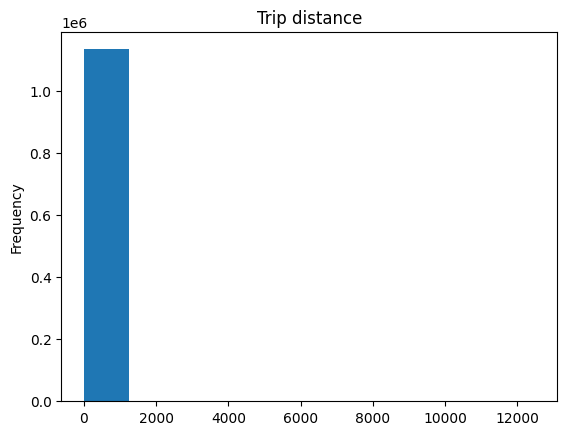

In [24]:
yellow_taxi_df['trip_distance'].plot(kind='hist', title='Trip distance')

<Axes: title={'center': 'Trip distance'}>

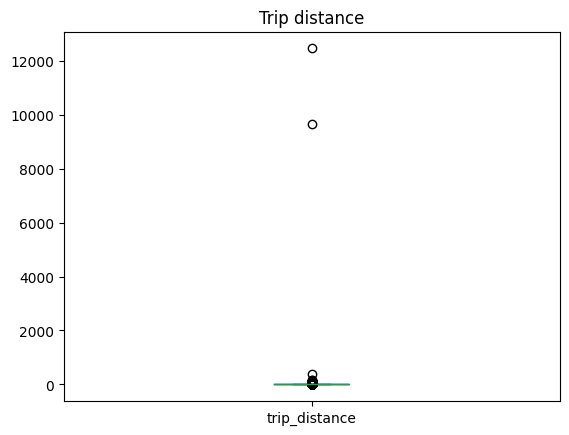

In [25]:
yellow_taxi_df['trip_distance'].plot(kind='box', title='Trip distance')

In [26]:
# calculate IQR for column Height
Q1 = yellow_taxi_df['trip_distance'].quantile(0.25)
Q3 = yellow_taxi_df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = yellow_taxi_df[(yellow_taxi_df['trip_distance'] < Q1 - threshold * IQR) | (yellow_taxi_df['trip_distance'] > Q3 + threshold * IQR)]
outliers

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,month,day,hour,day_of_week,weekend,season,isHoliday?
2,1,2022-01-21 16:43:50,2022-01-21 17:31:15,1.0,18.10,2.0,N,132,137,1,52.0,8.25,0.5,8.00,6.55,0.3,75.60,2.5,1.25,2022,1,21,17,4,False,Winter,False
9,2,2022-01-21 16:49:29,2022-01-21 18:16:12,1.0,22.93,5.0,N,132,265,1,125.0,0.00,0.0,30.78,26.10,0.3,185.93,2.5,1.25,2022,1,21,18,4,False,Winter,False
42,2,2022-01-21 16:29:15,2022-01-21 17:16:57,1.0,19.29,2.0,N,132,166,2,52.0,4.50,0.5,0.00,6.55,0.3,65.10,0.0,1.25,2022,1,21,17,4,False,Winter,False
60,2,2022-01-21 16:33:40,2022-01-21 17:25:00,2.0,18.45,2.0,N,132,230,2,52.0,4.50,0.5,0.00,6.55,0.3,67.60,2.5,1.25,2022,1,21,17,4,False,Winter,False
70,2,2022-01-21 16:46:36,2022-01-21 17:18:42,1.0,8.99,1.0,N,236,13,1,29.5,1.00,0.5,6.76,0.00,0.3,40.56,2.5,0.0,2022,1,21,17,4,False,Winter,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133560,2,2022-12-29 19:47:45,2022-12-29 20:16:57,1.0,11.98,1.0,N,138,50,1,49.9,7.50,0.5,0.00,6.55,1.0,69.20,2.5,1.25,2022,12,29,20,3,False,Winter,False
1133563,2,2022-12-29 19:24:26,2022-12-29 19:48:03,1.0,7.88,1.0,N,132,63,2,35.2,2.50,0.5,0.00,0.00,1.0,40.45,0.0,1.25,2022,12,29,19,3,False,Winter,False
1133564,2,2022-12-29 19:02:19,2022-12-29 20:25:38,2.0,50.06,4.0,N,132,132,2,333.4,2.50,0.5,0.00,0.00,1.0,338.65,0.0,1.25,2022,12,29,20,3,False,Winter,False
1133590,2,2022-12-29 19:33:57,2022-12-29 20:16:03,1.0,7.27,1.0,N,162,41,2,40.8,2.50,0.5,0.00,0.00,1.0,47.30,2.5,0.0,2022,12,29,20,3,False,Winter,False


In [27]:
outlier_trip= yellow_taxi_df[yellow_taxi_df['trip_distance']>8000]
outlier_trip

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,month,day,hour,day_of_week,weekend,season,isHoliday?
408304,2,2022-12-28 19:42:30,2022-12-28 20:02:08,1.0,9680.25,1.0,N,264,148,1,37.3,7.5,0.5,2.22,0.0,1.0,52.27,2.5,1.25,2022,12,28,20,2,False,Winter,False
796859,2,2022-08-24 20:02:07,2022-08-24 20:02:15,1.0,12477.70,1.0,N,238,193,2,29.5,1.0,0.5,0.00,0.0,0.3,33.80,2.5,0.0,2022,8,24,20,2,False,Summer,False


In [28]:
yellow_taxi_df= yellow_taxi_df.drop(yellow_taxi_df[yellow_taxi_df['trip_distance'] >8000].index)
#dropping unreasonable trip distances

<Axes: title={'center': 'Fare amount'}>

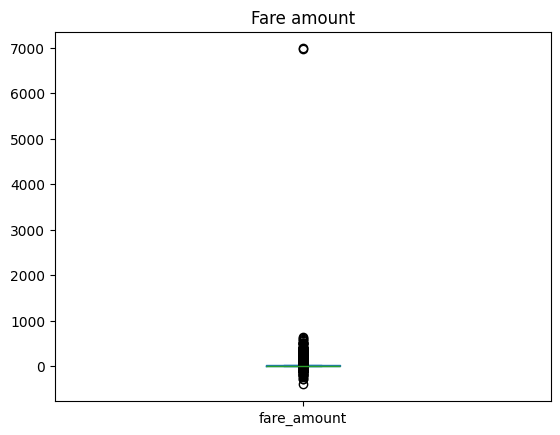

In [29]:
yellow_taxi_df['fare_amount'].plot(kind='box', title='Fare amount')

In [30]:
outlier_fare= yellow_taxi_df[yellow_taxi_df['fare_amount']>6000]
outlier_fare

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,month,day,hour,day_of_week,weekend,season,isHoliday?
421499,2,2022-06-26 16:20:55,2022-06-26 16:54:05,1.0,8.84,1.0,N,138,107,2,6982.0,0.0,0.5,0.0,6.55,0.3,6993.1,2.5,1.25,2022,6,26,16,6,True,Summer,False
790446,2,2022-06-08 17:52:13,2022-06-08 18:35:26,1.0,7.18,1.0,N,237,158,2,6977.0,1.0,0.5,0.0,0.00,0.3,6981.3,2.5,0.0,2022,6,8,18,2,False,Summer,False


In [31]:
yellow_taxi_df= yellow_taxi_df.drop(yellow_taxi_df[yellow_taxi_df['fare_amount'] >6000].index)
#dropping unreasonable fare amounts

<Axes: title={'center': 'Extra'}>

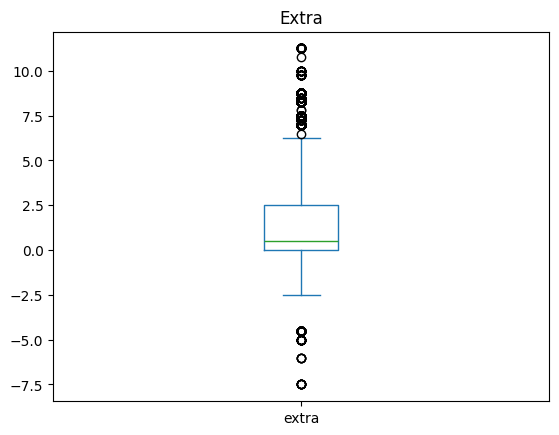

In [32]:
yellow_taxi_df['extra'].plot(kind='box', title='Extra')

<Axes: title={'center': 'Mta tax'}>

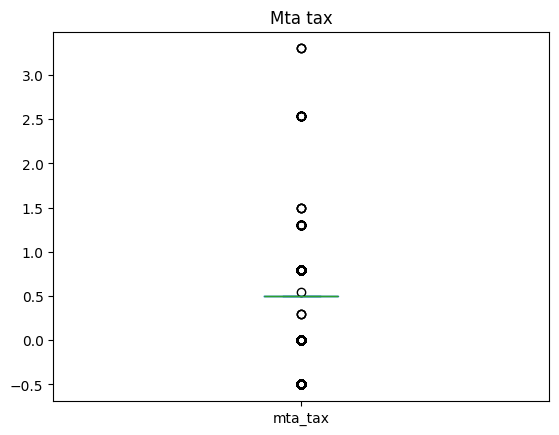

In [33]:
yellow_taxi_df['mta_tax'].plot(kind='box', title='Mta tax')

<Axes: title={'center': 'Tip_amount'}>

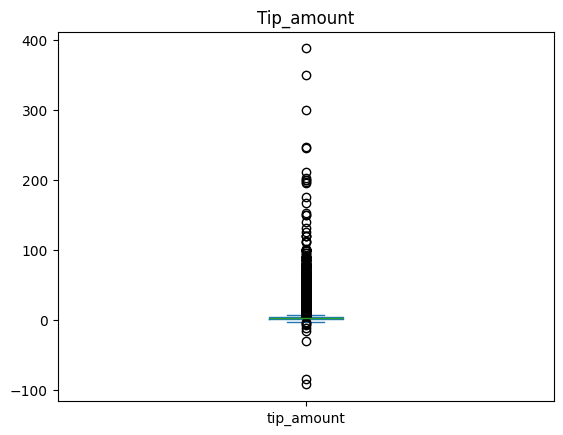

In [34]:
yellow_taxi_df['tip_amount'].plot(kind='box', title='Tip_amount')

<Axes: title={'center': 'Tolls amount'}>

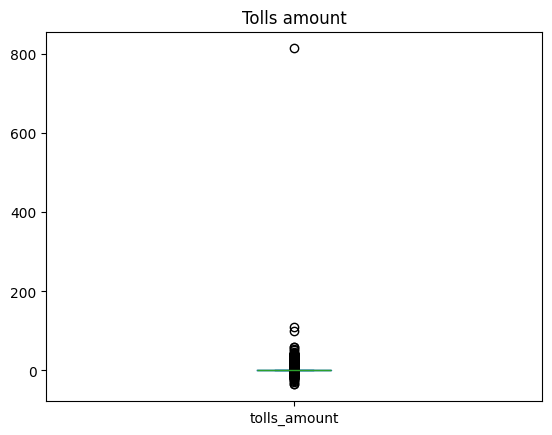

In [35]:
yellow_taxi_df['tolls_amount'].plot(kind='box', title='Tolls amount')

In [36]:
outlier_toll= yellow_taxi_df[yellow_taxi_df['tolls_amount']>800]
outlier_toll

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,month,day,hour,day_of_week,weekend,season,isHoliday?
158545,1,2022-05-21 13:47:48,2022-05-21 14:05:47,1.0,2.4,3.0,N,239,246,3,31.5,0.0,0.0,0.0,813.75,0.3,845.55,0.0,0.0,2022,5,21,14,5,True,Spring,False


In [37]:
yellow_taxi_df= yellow_taxi_df.drop(yellow_taxi_df[yellow_taxi_df['tolls_amount'] >800].index)
#dropping unreasonable tolls amount

<Axes: title={'center': 'Improvement surcharge'}>

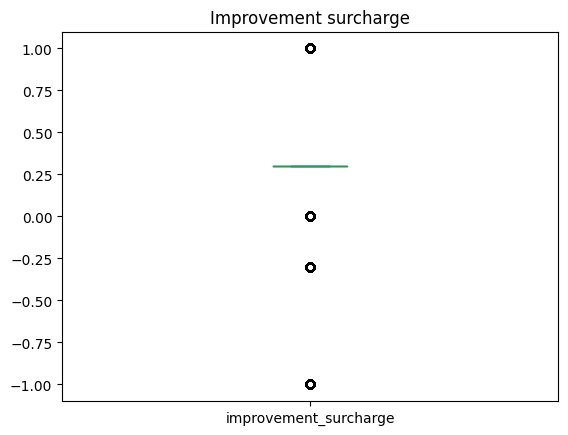

In [38]:
yellow_taxi_df['improvement_surcharge'].plot(kind='box', title='Improvement surcharge')

<Axes: title={'center': 'total_amount'}>

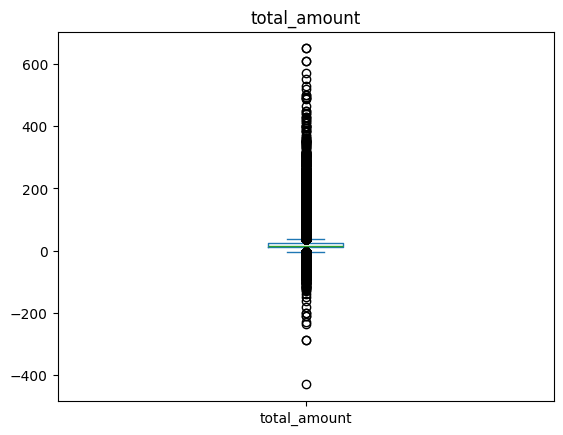

In [39]:
yellow_taxi_df['total_amount'].plot(kind='box', title='total_amount')

<Axes: title={'center': 'Congestion surcharge'}>

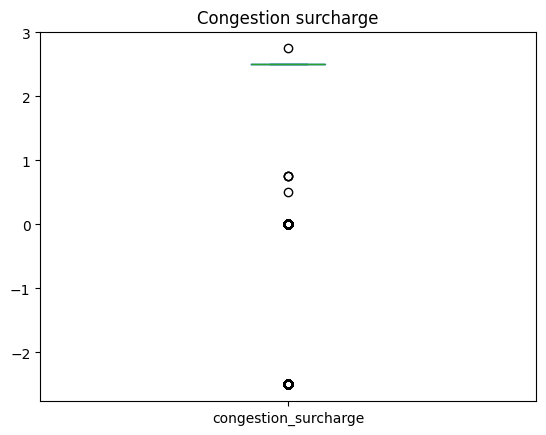

In [40]:
yellow_taxi_df['congestion_surcharge'].plot(kind='box', title='Congestion surcharge')

In [41]:
yellow_taxi_df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,month,day,hour,day_of_week,weekend,season,isHoliday?
0,2,2022-01-21 16:27:07,2022-01-21 16:42:46,1.0,2.72,1.0,N,74,262,1,12.5,1.00,0.5,3.36,0.00,0.3,20.16,2.5,0.0,2022,1,21,16,4,False,Winter,False
1,2,2022-01-21 16:57:09,2022-01-21 17:04:30,1.0,1.28,1.0,N,141,236,1,6.5,1.00,0.5,2.16,0.00,0.3,12.96,2.5,0.0,2022,1,21,17,4,False,Winter,False
2,1,2022-01-21 16:43:50,2022-01-21 17:31:15,1.0,18.10,2.0,N,132,137,1,52.0,8.25,0.5,8.00,6.55,0.3,75.60,2.5,1.25,2022,1,21,17,4,False,Winter,False
3,2,2022-01-21 16:22:49,2022-01-21 16:26:32,1.0,0.75,1.0,N,249,79,1,4.5,1.00,0.5,1.76,0.00,0.3,10.56,2.5,0.0,2022,1,21,16,4,False,Winter,False
4,2,2022-01-21 16:34:36,2022-01-21 16:43:53,1.0,1.86,1.0,N,107,229,2,8.5,1.00,0.5,0.00,0.00,0.3,12.80,2.5,0.0,2022,1,21,16,4,False,Winter,False


#### Categorical features

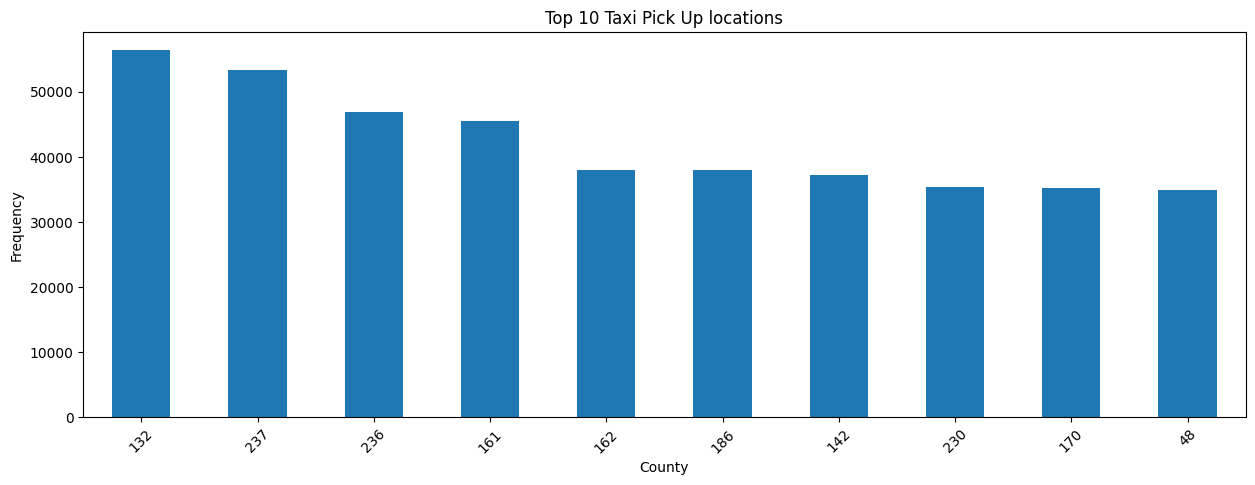

<Axes: title={'center': 'Top 10 Taxi Pick Up locations'}, xlabel='County', ylabel='Frequency'>

In [42]:
# Get the top N most frequent counties
top_pickup_location= yellow_taxi_df['pulocationid'].value_counts(dropna=False).nlargest(10)

# Plot the bar chart for the top 10 counties
top_dropoff=top_pickup_location.plot(kind='bar', figsize=(15, 5))
plt.xlabel('County')
plt.ylabel('Frequency')
plt.title('Top 10 Taxi Pick Up locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
top_dropoff




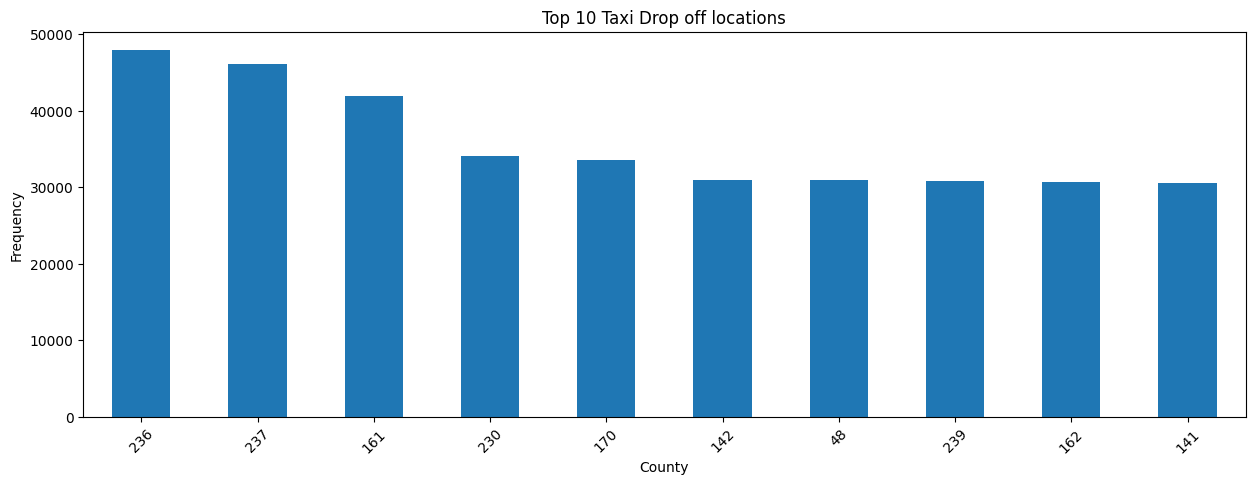

<Axes: title={'center': 'Top 10 Taxi Drop off locations'}, xlabel='County', ylabel='Frequency'>

In [43]:
# Get the top N most frequent counties
top_dropoff_location= yellow_taxi_df['dolocationid'].value_counts(dropna=False).nlargest(10)

# Plot the bar chart for the top 10 counties
top_dropoff=top_dropoff_location.plot(kind='bar', figsize=(15, 5))
plt.xlabel('County')
plt.ylabel('Frequency')
plt.title('Top 10 Taxi Drop off locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
top_dropoff




<Axes: title={'center': 'Payment type'}, xlabel='Categories', ylabel='Frequency'>

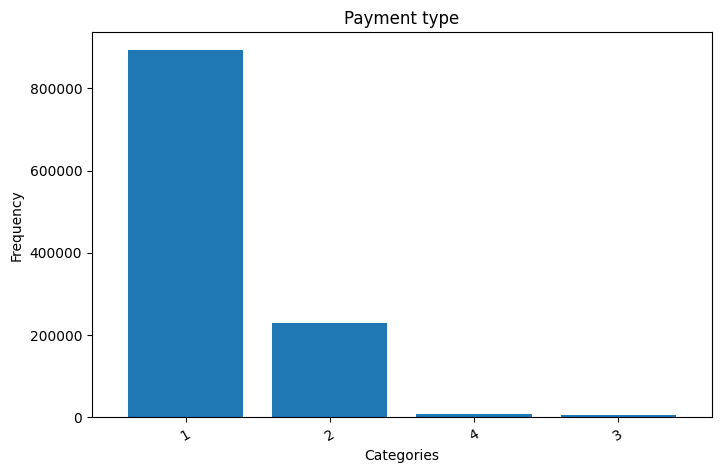

In [44]:
fare=yellow_taxi_df['payment_type'].value_counts(dropna = False).plot(kind='bar',figsize=(8,5),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Payment type')
plt.xticks(rotation=30) 
fare


<Axes: title={'center': 'Passenger Count'}, xlabel='Categories', ylabel='Frequency'>

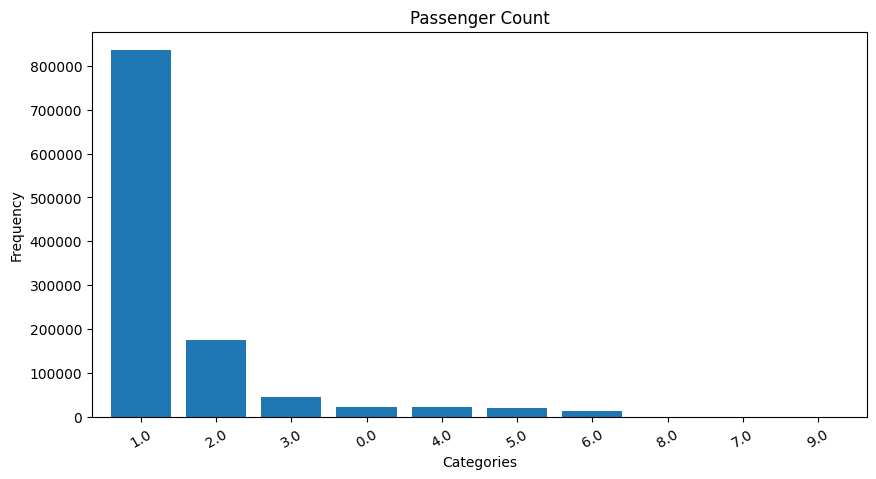

In [45]:
passengercount=yellow_taxi_df['passenger_count'].value_counts(dropna = False).plot(kind='bar',figsize=(10,5),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Passenger Count')
plt.xticks(rotation=30) 
passengercount


<Axes: title={'center': 'Year'}, xlabel='Categories', ylabel='Frequency'>

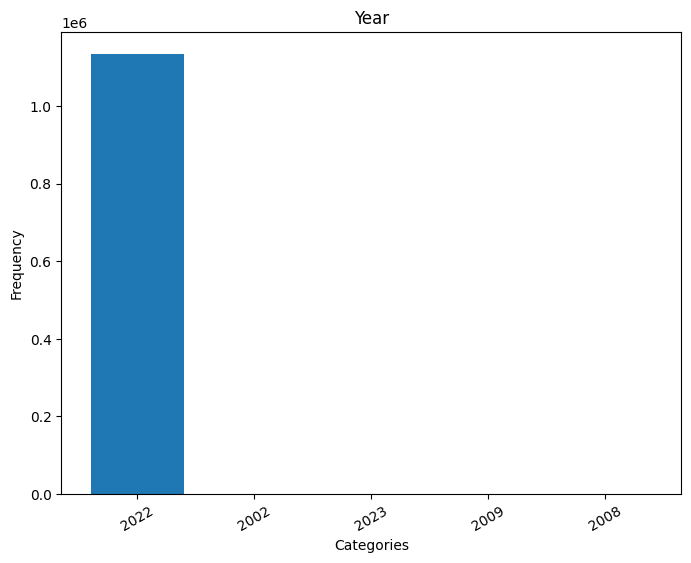

In [46]:
year=yellow_taxi_df['year'].value_counts(dropna = False).plot(kind='bar',figsize=(8,6),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Year')
plt.xticks(rotation=30) 
year


In [47]:
yellow_taxi_df['year'].value_counts()

year
2022    1133576
2002          5
2023          4
2009          3
2008          1
Name: count, dtype: int64

In [48]:
# drop all rows that contain years not in 2022
yellow_taxi_df= yellow_taxi_df.drop(yellow_taxi_df[yellow_taxi_df['year'] == '2002'].index)
yellow_taxi_df= yellow_taxi_df.drop(yellow_taxi_df[yellow_taxi_df['year'] == '2023'].index)
yellow_taxi_df= yellow_taxi_df.drop(yellow_taxi_df[yellow_taxi_df['year'] == '2009'].index)
yellow_taxi_df= yellow_taxi_df.drop(yellow_taxi_df[yellow_taxi_df['year'] == '2008'].index)
yellow_taxi_df['year'].value_counts()

year
2022    1133576
Name: count, dtype: int64

<Axes: title={'center': 'Month'}, xlabel='Categories', ylabel='Frequency'>

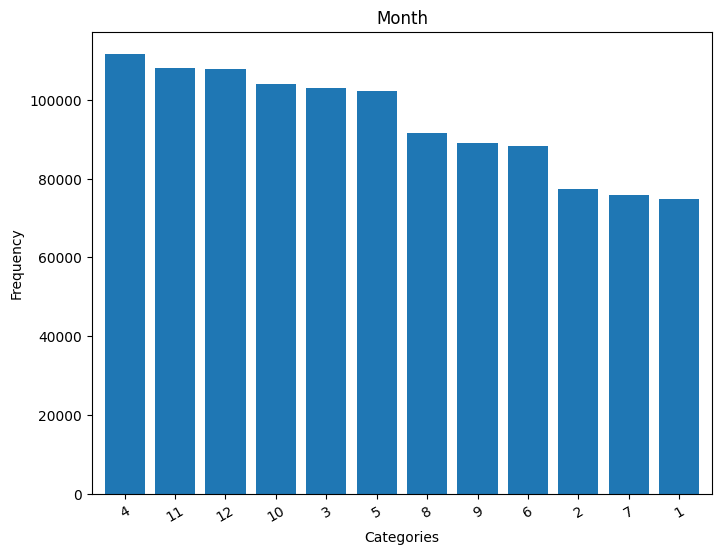

In [49]:
month=yellow_taxi_df['month'].value_counts(dropna = False).plot(kind='bar',figsize=(8,6),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Month')
plt.xticks(rotation=30) 
month


<Axes: title={'center': 'Day'}, xlabel='Categories', ylabel='Frequency'>

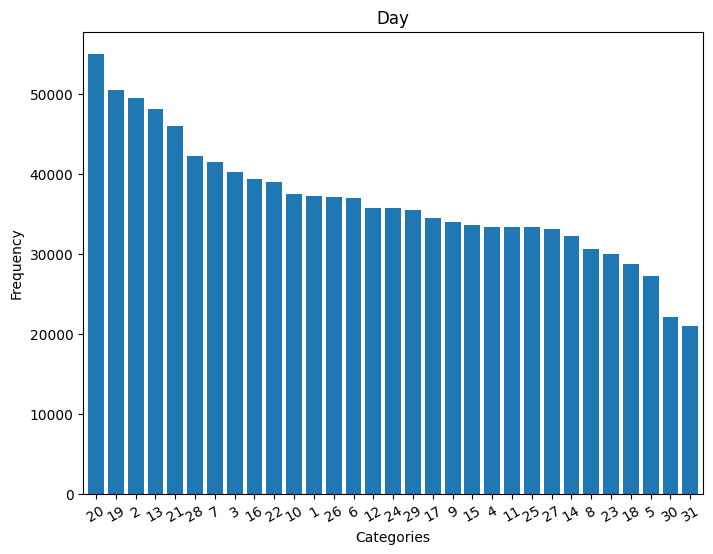

In [50]:
year=yellow_taxi_df['day'].value_counts(dropna = False).plot(kind='bar',figsize=(8,6),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Day')
plt.xticks(rotation=30) 
year


<Axes: title={'center': 'Hour'}, xlabel='Categories', ylabel='Frequency'>

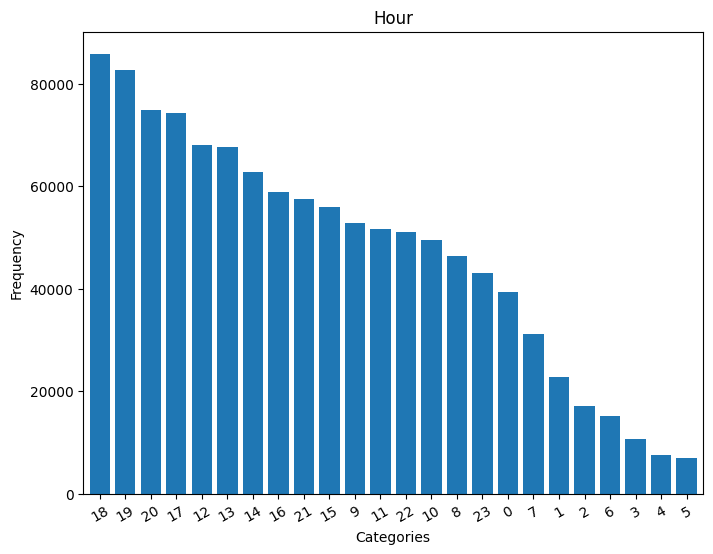

In [51]:
hour=yellow_taxi_df['hour'].value_counts(dropna = False).plot(kind='bar',figsize=(8,6),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Hour')
plt.xticks(rotation=30) 
hour


<Axes: title={'center': 'Day of week'}, xlabel='Categories', ylabel='Frequency'>

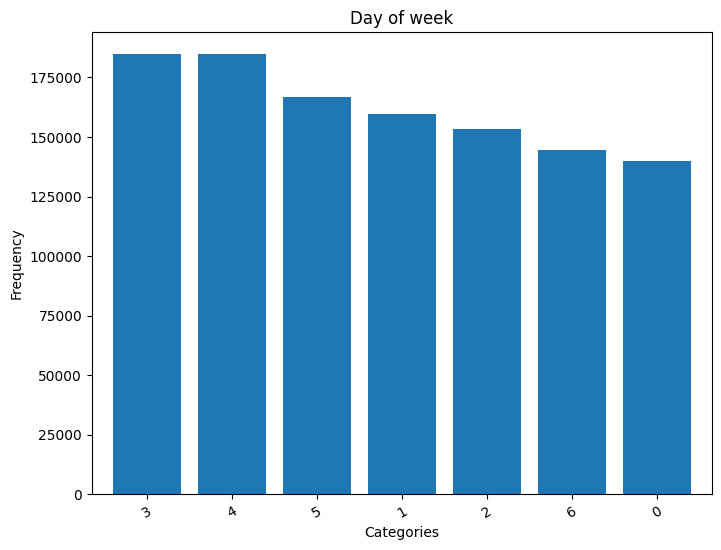

In [52]:
day_of_week=yellow_taxi_df['day_of_week'].value_counts(dropna = False).plot(kind='bar',figsize=(8,6),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Day of week')
plt.xticks(rotation=30) 
day_of_week


<Axes: title={'center': 'Weekend'}, xlabel='Categories', ylabel='Frequency'>

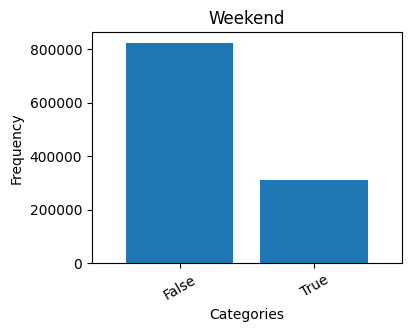

In [53]:
weekend=yellow_taxi_df['weekend'].value_counts(dropna = False).plot(kind='bar',figsize=(4,3),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Weekend')
plt.xticks(rotation=30) 
weekend


<Axes: title={'center': 'Weekend'}, xlabel='Categories', ylabel='Frequency'>

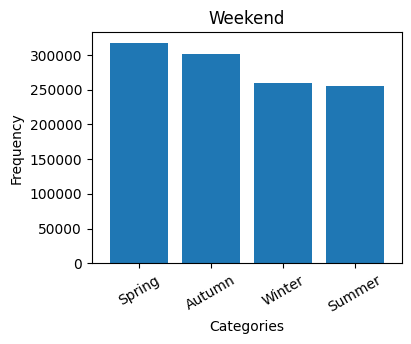

In [54]:
season=yellow_taxi_df['season'].value_counts(dropna = False).plot(kind='bar',figsize=(4,3),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Weekend')
plt.xticks(rotation=30) 
season


<Axes: title={'center': 'Airport fee'}, xlabel='Categories', ylabel='Frequency'>

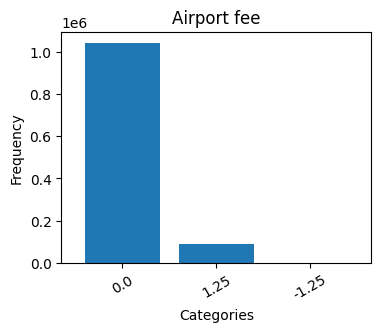

In [55]:
airport_fee=yellow_taxi_df['airport_fee'].value_counts(dropna = False).plot(kind='bar',figsize=(4,3),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Airport fee')
plt.xticks(rotation=30) 
airport_fee


In [56]:
airport_fee_values=yellow_taxi_df['airport_fee'].value_counts()
airport_fee_values

airport_fee
0.0      1043779
1.25       88977
-1.25        820
Name: count, dtype: int64

In [57]:
yellow_taxi_df['passenger_count_number']=yellow_taxi_df['passenger_count'].astype('float64')
yellow_taxi_df['passenger_count_number']=yellow_taxi_df['passenger_count_number'].astype('int64')

In [58]:
yellow_taxi_df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,month,day,hour,day_of_week,weekend,season,isHoliday?,passenger_count_number
0,2,2022-01-21 16:27:07,2022-01-21 16:42:46,1.0,2.72,1.0,N,74,262,1,12.5,1.00,0.5,3.36,0.00,0.3,20.16,2.5,0.0,2022,1,21,16,4,False,Winter,False,1
1,2,2022-01-21 16:57:09,2022-01-21 17:04:30,1.0,1.28,1.0,N,141,236,1,6.5,1.00,0.5,2.16,0.00,0.3,12.96,2.5,0.0,2022,1,21,17,4,False,Winter,False,1
2,1,2022-01-21 16:43:50,2022-01-21 17:31:15,1.0,18.10,2.0,N,132,137,1,52.0,8.25,0.5,8.00,6.55,0.3,75.60,2.5,1.25,2022,1,21,17,4,False,Winter,False,1
3,2,2022-01-21 16:22:49,2022-01-21 16:26:32,1.0,0.75,1.0,N,249,79,1,4.5,1.00,0.5,1.76,0.00,0.3,10.56,2.5,0.0,2022,1,21,16,4,False,Winter,False,1
4,2,2022-01-21 16:34:36,2022-01-21 16:43:53,1.0,1.86,1.0,N,107,229,2,8.5,1.00,0.5,0.00,0.00,0.3,12.80,2.5,0.0,2022,1,21,16,4,False,Winter,False,1


In [59]:
yellow_taxi_df.dtypes

vendorid                          object
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                   object
trip_distance                    float64
ratecodeid                        object
store_and_fwd_flag                object
pulocationid                      object
dolocationid                      object
payment_type                      object
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
airport_fee                       object
year                              object
month                             object
day                               object
hour                              object
day_of_week                       object
weekend         

#### Feature engineering target outcome

In [60]:
taxi_zones_gdf['centroid']=taxi_zones_gdf.centroid

C:\Users\Justh\AppData\Local\Temp\ipykernel_18620\2005994393.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taxi_zones_gdf['centroid']=taxi_zones_gdf.centroid


In [61]:

# Merge on pickup location ID
merged_pickup = yellow_taxi_df.merge(taxi_zones_gdf, how='left', left_on='pulocationid', right_on='location_id')

# Merge on dropoff location ID
merged_full = merged_pickup.merge(taxi_zones_gdf, how='left', left_on='pulocationid', right_on='location_id', suffixes=('_pickup', '_dropoff'))


In [62]:
merged_full.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'year', 'month',
       'day', 'hour', 'day_of_week', 'weekend', 'season', 'isHoliday?',
       'passenger_count_number', 'shape_area_pickup', 'objectid_pickup',
       'shape_leng_pickup', 'location_id_pickup', 'zone_pickup',
       'borough_pickup', 'geometry_pickup', 'centroid_pickup',
       'shape_area_dropoff', 'objectid_dropoff', 'shape_leng_dropoff',
       'location_id_dropoff', 'zone_dropoff', 'borough_dropoff',
       'geometry_dropoff', 'centroid_dropoff'],
      dtype='object')

In [63]:
# Analyze: Count trips per pickup zone
trips_per_zone_pickup = merged_full['location_id_pickup'].value_counts().reset_index()
trips_per_zone_dropoff = merged_full['location_id_dropoff'].value_counts().reset_index()

trips_per_zone_pickup.columns = ['location_id', 'trip_count_pickup']
trips_per_zone_dropoff.columns = ['location_id','trip_count_dropoff']


trips_per_zone_dropoff = trips_per_zone_dropoff.merge(taxi_zones_gdf[['location_id', 'zone','geometry']], on='location_id')
print(trips_per_zone_dropoff )

   location_id  trip_count_dropoff                          zone  \
0          237               53312         Upper East Side South   
1          236               46837         Upper East Side North   
2          161               45422                Midtown Center   
3          162               37993                  Midtown East   
4          186               37992  Penn Station/Madison Sq West   
..         ...                 ...                           ...   
61         194                  56               Randalls Island   
62         202                  41              Roosevelt Island   
63         153                  18                   Marble Hill   
64         120                  10               Highbridge Park   
65         128                   8              Inwood Hill Park   

                                             geometry  
0   MULTIPOLYGON (((-73.96613 40.76218, -73.96658 ...  
1   MULTIPOLYGON (((-73.95779 40.77360, -73.95826 ...  
2   MULTIPOLYGO

In [64]:
type(trips_per_zone_dropoff)

pandas.core.frame.DataFrame

In [65]:
passengers_total= merged_full.groupby('dolocationid')['passenger_count_number'].sum().reset_index()
passengers_total_count= merged_full.groupby('dolocationid')['passenger_count_number'].value_counts()

In [66]:
passengers_total_count

dolocationid  passenger_count_number
1             1                         1769
              2                          733
              3                          333
              4                          131
              0                           62
                                        ... 
98            4                            4
              3                            3
              5                            3
              6                            2
99            1                            2
Name: count, Length: 1635, dtype: int64

In [67]:
passengers_by_zone_datetime= merged_full.groupby(['dolocationid','year','month','day','hour'])['passenger_count_number'].sum().reset_index()
passengers_by_zone_datetime

,dolocationid,year,month,day,hour,passenger_count_number
0,1,2022,1,1,11,6
1,1,2022,1,1,12,5
2,1,2022,1,1,16,4
3,1,2022,1,1,17,4
4,1,2022,1,1,20,1
...,...,...,...,...,...,...
181710,98,2022,9,7,17,4
181711,98,2022,9,9,19,2
181712,98,2022,9,9,20,1
181713,99,2022,11,28,14,1


In [68]:
merged_full.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'year', 'month',
       'day', 'hour', 'day_of_week', 'weekend', 'season', 'isHoliday?',
       'passenger_count_number', 'shape_area_pickup', 'objectid_pickup',
       'shape_leng_pickup', 'location_id_pickup', 'zone_pickup',
       'borough_pickup', 'geometry_pickup', 'centroid_pickup',
       'shape_area_dropoff', 'objectid_dropoff', 'shape_leng_dropoff',
       'location_id_dropoff', 'zone_dropoff', 'borough_dropoff',
       'geometry_dropoff', 'centroid_dropoff'],
      dtype='object')

In [69]:
merged_full['passenger_count_number'].dtypes

dtype('int64')

In [70]:
passengers_by_zone_datetime.rename(columns = {'dolocationid':'location_id'}, inplace = True)

In [71]:
passengers_by_zone_datetime.shape

(181715, 6)

In [72]:
merged_full

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,month,day,hour,day_of_week,weekend,season,isHoliday?,passenger_count_number,shape_area_pickup,objectid_pickup,shape_leng_pickup,location_id_pickup,zone_pickup,borough_pickup,geometry_pickup,centroid_pickup,shape_area_dropoff,objectid_dropoff,shape_leng_dropoff,location_id_dropoff,zone_dropoff,borough_dropoff,geometry_dropoff,centroid_dropoff
0,2,2022-01-21 16:27:07,2022-01-21 16:42:46,1.0,2.72,1.0,N,74,262,1,12.5,1.00,0.5,3.36,0.00,0.3,20.16,2.5,0.0,2022,1,21,16,4,False,Winter,False,1,0.000295038418204,74,0.11029093625,74,East Harlem North,Manhattan,"MULTIPOLYGON (((-73.93381 40.81651, -73.93383 ...",POINT (-73.93735 40.80117),0.000295038418204,74,0.11029093625,74,East Harlem North,Manhattan,"MULTIPOLYGON (((-73.93381 40.81651, -73.93383 ...",POINT (-73.93735 40.80117)
1,2,2022-01-21 16:57:09,2022-01-21 17:04:30,1.0,1.28,1.0,N,141,236,1,6.5,1.00,0.5,2.16,0.00,0.3,12.96,2.5,0.0,2022,1,21,17,4,False,Winter,False,1,0.0000766545579019,141,0.0415144638712,141,Lenox Hill West,Manhattan,"MULTIPOLYGON (((-73.96178 40.75988, -73.96197 ...",POINT (-73.95963 40.76695),0.0000766545579019,141,0.0415144638712,141,Lenox Hill West,Manhattan,"MULTIPOLYGON (((-73.96178 40.75988, -73.96197 ...",POINT (-73.95963 40.76695)
2,1,2022-01-21 16:43:50,2022-01-21 17:31:15,1.0,18.10,2.0,N,132,137,1,52.0,8.25,0.5,8.00,6.55,0.3,75.60,2.5,1.25,2022,1,21,17,4,False,Winter,False,1,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,2,2022-01-21 16:22:49,2022-01-21 16:26:32,1.0,0.75,1.0,N,249,79,1,4.5,1.00,0.5,1.76,0.00,0.3,10.56,2.5,0.0,2022,1,21,16,4,False,Winter,False,1,0.0000722155957729,249,0.03638434365,249,West Village,Manhattan,"MULTIPOLYGON (((-74.00251 40.72902, -74.00282 ...",POINT (-74.00287 40.73458),0.0000722155957729,249,0.03638434365,249,West Village,Manhattan,"MULTIPOLYGON (((-74.00251 40.72902, -74.00282 ...",POINT (-74.00287 40.73458)
4,2,2022-01-21 16:34:36,2022-01-21 16:43:53,1.0,1.86,1.0,N,107,229,2,8.5,1.00,0.5,0.00,0.00,0.3,12.80,2.5,0.0,2022,1,21,16,4,False,Winter,False,1,0.0000746112192675,107,0.0380413645908,107,Gramercy,Manhattan,"MULTIPOLYGON (((-73.98239 40.73141, -73.98256 ...",POINT (-73.98405 40.73682),0.0000746112192675,107,0.0380413645908,107,Gramercy,Manhattan,"MULTIPOLYGON (((-73.98239 40.73141, -73.98256 ...",POINT (-73.98405 40.73682)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133571,2,2022-12-29 19:36:52,2022-12-29 20:09:15,3.0,1.81,1.0,N,161,164,1,26.8,2.50,0.5,1.00,0.00,1.0,34.30,2.5,0.0,2022,12,29,20,3,False,Winter,False,3,0.0000719130682992,161,0.0358039100611,161,Midtown Center,Manhattan,"MULTIPOLYGON (((-73.97534 40.75530, -73.97581 ...",POINT (-73.97770 40.75803),0.0000719130682992,161,0.0358039100611,161,Midtown Center,Manhattan,"MULTIPOLYGON (((-73.97534 40.75530, -73.97581 ...",POINT (-73.97770 40.75803)
1133572,2,2022-12-29 19:33:57,2022-12-29 20:16:03,1.0,7.27,1.0,N,162,41,2,40.8,2.50,0.5,0.00,0.00,1.0,47.30,2.5,0.0,2022,12,29,20,3,False,Winter,False,1,0.0000478936962112,162,0.0352698146219,162,Midtown East,Manhattan,"MULTIPOLYGON (((-73.97122 40.75519, -73.97168 ...",POINT (-73.97236 40.75669),0.0000478936962112,162,0.0352698146219,162,Midtown East,Manhattan,"MULTIPOLYGON (((-73.97122 40.75519, -73.97168 ...",POINT (-73.97236 40.75669)
1133573,2,2022-12-29 19:47:35,2022-12-29 20:02:39,1.0,2.21,1.0,N,186,114,1,14.9,2.50,0.5,4.28,0.00,1.0,25.68,2.5,0.0,2022,12,29,20,3,False,Winter,False,1,0.0000370729416953,186,0.0246963902234,186,Penn Station/Madison Sq West,Manhattan,"MULTIPOLYGON (((-73.99097 40.74542, -73.99142 ...",POINT (-73.99244 40.74850),0.0000370729416953,186,0.0246963902234,18

In [73]:
merged_full_details= merged_full[['dolocationid','day_of_week','weekend','season','isHoliday?']]

In [74]:
passengers_by_zone_datetime1= merged_full.groupby(['dolocationid','year','month','day','hour','day_of_week','weekend','season','isHoliday?'])['passenger_count_number'].sum().reset_index()
passengers_by_zone_datetime1

,dolocationid,year,month,day,hour,day_of_week,weekend,season,isHoliday?,passenger_count_number
0,1,2022,1,1,11,5,True,Winter,True,6
1,1,2022,1,1,12,5,True,Winter,True,5
2,1,2022,1,1,16,5,True,Winter,True,4
3,1,2022,1,1,17,5,True,Winter,True,4
4,1,2022,1,1,20,5,True,Winter,True,1
...,...,...,...,...,...,...,...,...,...,...
181710,98,2022,9,7,17,2,False,Autumn,False,4
181711,98,2022,9,9,19,4,False,Autumn,False,2
181712,98,2022,9,9,20,4,False,Autumn,False,1
181713,99,2022,11,28,14,0,False,Autumn,False,1


In [75]:
passengers_by_zone_datetime1.rename(columns = {'dolocationid':'location_id'}, inplace = True)

In [76]:
passengers_by_zone_datetime_gdf1 = passengers_by_zone_datetime1.merge(taxi_zones_gdf[['location_id', 'zone','geometry']],on='location_id')
passengers_by_zone_datetime_gdf1

,location_id,year,month,day,hour,day_of_week,weekend,season,isHoliday?,passenger_count_number,zone,geometry
0,100,2022,1,1,10,5,True,Winter,True,6,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
1,100,2022,1,1,11,5,True,Winter,True,9,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
2,100,2022,1,1,12,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
3,100,2022,1,1,16,5,True,Winter,True,24,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
4,100,2022,1,1,17,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
115874,90,2022,9,9,18,4,False,Autumn,False,2,Flatiron,"MULTIPOLYGON (((-73.99634 40.73804, -73.99684 ..."
115875,90,2022,9,9,19,4,False,Autumn,False,32,Flatiron,"MULTIPOLYGON (((-73.99634 40.73804, -73.99684 ..."
115876,90,2022,9,9,20,4,False,Autumn,False,7,Flatiron,"MULTIPOLYGON (((-73.99634 40.73804, -73.99684 ..."
115877,90,2022,9,9,8,4,False,Autumn,False,10,Flatiron,"MULTIPOLYGON (((-73.99634 40.73804, -73.99684 ..."


In [77]:
passengers_by_zone_datetime_gdf1.rename(columns = {'passenger_count_number':'taxi_zone_busyness'}, inplace = True)

In [78]:
passengers_by_zone_datetime_gdf1.head()

,location_id,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,zone,geometry
0,100,2022,1,1,10,5,True,Winter,True,6,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
1,100,2022,1,1,11,5,True,Winter,True,9,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
2,100,2022,1,1,12,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
3,100,2022,1,1,16,5,True,Winter,True,24,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
4,100,2022,1,1,17,5,True,Winter,True,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."


In [79]:
passengers_by_zone_datetime_gdf1= gpd.GeoDataFrame(passengers_by_zone_datetime_gdf1, geometry='geometry')

In [80]:
#passengers_by_zone_datetime_gdf1.to_file('yellow_taxi_busyness_details_hourly.geojson',driver='GeoJSON')

KeyboardInterrupt: 

In [81]:
passengers_by_zone_datetime_gdf = passengers_by_zone_datetime.merge(taxi_zones_gdf[['location_id', 'zone','geometry']],on='location_id')
passengers_by_zone_datetime_gdf

,location_id,year,month,day,hour,passenger_count_number,zone,geometry
0,100,2022,1,1,10,6,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
1,100,2022,1,1,11,9,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
2,100,2022,1,1,12,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
3,100,2022,1,1,16,24,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
4,100,2022,1,1,17,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
...,...,...,...,...,...,...,...,...
115874,90,2022,9,9,18,2,Flatiron,"MULTIPOLYGON (((-73.99634 40.73804, -73.99684 ..."
115875,90,2022,9,9,19,32,Flatiron,"MULTIPOLYGON (((-73.99634 40.73804, -73.99684 ..."
115876,90,2022,9,9,20,7,Flatiron,"MULTIPOLYGON (((-73.99634 40.73804, -73.99684 ..."
115877,90,2022,9,9,8,10,Flatiron,"MULTIPOLYGON (((-73.99634 40.73804, -73.99684 ..."


In [82]:
passengers_by_location_datetime= merged_full.groupby(['dolocationid'])['passenger_count_number'].sum().reset_index()
passengers_by_location_datetime.rename(columns = {'dolocationid':'location_id'}, inplace = True)


In [83]:
passengers_by_location_datetime_gdf = passengers_by_location_datetime.merge(taxi_zones_gdf[['location_id', 'zone','geometry']],on='location_id')
passengers_by_location_datetime_gdf.head(5)

,location_id,passenger_count_number,zone,geometry
0,100,23076,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
1,107,31164,Gramercy,"MULTIPOLYGON (((-73.98239 40.73141, -73.98256 ..."
2,113,18757,Greenwich Village North,"MULTIPOLYGON (((-73.99136 40.72756, -73.99155 ..."
3,114,16037,Greenwich Village South,"MULTIPOLYGON (((-73.99258 40.72420, -73.99260 ..."
4,116,4171,Hamilton Heights,"MULTIPOLYGON (((-73.93925 40.82830, -73.93969 ..."


In [84]:
passengers_by_location_datetime_gdf = gpd.GeoDataFrame(passengers_by_location_datetime_gdf, geometry='geometry')

In [85]:
import folium 
import matplotlib.pyplot as plt
import mapclassify


In [87]:
passengers_by_location_datetime_gdf.explore("passenger_count_number", legend=True)

In [ ]:
taxi_zones_gdf.columns

Index(['shape_area', 'objectid', 'shape_leng', 'location_id', 'zone',
       'borough', 'geometry', 'centroid'],
      dtype='object')

In [ ]:
passengers_by_zone_datetime_gdf = passengers_by_zone_datetime.merge(taxi_zones_gdf[['location_id', 'zone','geometry']],on='location_id')
passengers_by_zone_datetime_gdf.head(5)

,location_id,year,month,day,hour,passenger_count_number,zone,geometry
0,100,2022,1,1,10,6,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
1,100,2022,1,1,11,9,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
2,100,2022,1,1,12,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
3,100,2022,1,1,16,24,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."
4,100,2022,1,1,17,4,Garment District,"MULTIPOLYGON (((-73.98729 40.75045, -73.98777 ..."


In [ ]:
# Set the geometry column explicitly
passengers_by_zone_datetime_gdf = gpd.GeoDataFrame(passengers_by_zone_datetime_gdf, geometry='geometry')


In [ ]:
type(passengers_by_zone_datetime_gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
passengers_by_zone_datetime_gdf.to_file('passengers_by_zone_datetime.geojson',driver='GeoJSON')

In [ ]:
yellow_taxi_df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'year', 'month',
       'day', 'hour', 'day_of_week', 'weekend', 'season', 'isHoliday?',
       'passenger_count_number'],
      dtype='object')

In [ ]:
passengers_by_zone_season= merged_full.groupby(['dolocationid'])['passenger_count_number'].sum().reset_index()
passengers_by_zone_season

,dolocationid,passenger_count_number
0,1,5277
1,10,1505
2,100,23076
3,101,131
4,102,264
...,...,...
256,95,1925
257,96,38
258,97,1907
259,98,213
